# Loading all the dependencies

In [1]:
import os
import gzip
import cv2
import numpy as np
import pandas as pd
import config as config
import tensorflow as tf
import matplotlib.pyplot as plt
from make_dataset import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [2]:
train_img, train_labels = load_data("train")
test_img, test_labels = load_data("test")

Loading Training Data...
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Loading Testing Data...
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Loading the dataset

In [3]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [4]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

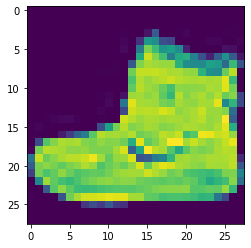

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

# Normalize the data

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [13]:
model = Sequential()
model.add(Conv2D(
        filters=32,
        kernel_size=(4,4),
        activation="relu",
        input_shape=(28,28, 1),
    )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train,y_cat_train,validation_data=(x_test, y_cat_test),epochs=3,verbose=0)

# Saving the model

In [38]:
model_path = r"C:\Rohan\Vector AI\repo\rohan_vai\src\models\trained_models\fmnist_model.h5"
model.save(model_path)
# loaded_model = joblib.load(filename)


# Loading the model

In [39]:
model1 = load_model(model_path)

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:

metrics = pd.DataFrame(model.history.history)

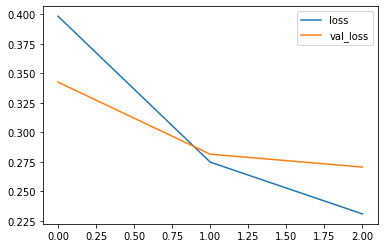

In [50]:
metrics[["loss","val_loss"]].plot()
plt.savefig(r"C:\Rohan\Vector AI\repo\rohan_vai\src\models\trained_models\1.png")

<AxesSubplot:>

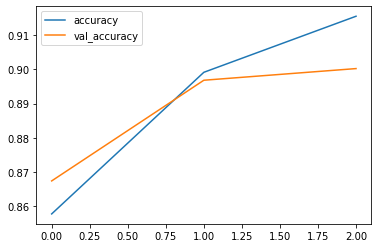

In [45]:
metrics[["accuracy","val_accuracy"]].plot()

In [21]:
predictions = np.argmax(model.predict(x_test), axis=1)  #

In [22]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.82      0.85      0.83      1000
           3       0.93      0.89      0.91      1000
           4       0.81      0.87      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.65      0.70      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [51]:
report = classification_report(y_test, predictions, output_dict=True)
df = pd.DataFrame(report).transpose()

In [52]:
df

,precision,recall,f1-score,support
0,0.809567,0.8970,0.851044,1000.0000
1,0.995923,0.9770,0.986371,1000.0000
2,0.817391,0.8460,0.831450,1000.0000
3,0.932150,0.8930,0.912155,1000.0000
4,0.809879,0.8690,0.838398,1000.0000
5,0.986815,0.9730,0.979859,1000.0000
6,0.756944,0.6540,0.701717,1000.0000
7,0.957000,0.9570,0.957000,1000.0000
8,0.989765,0.9670,0.978250,1000.0000
9,0.951866,0.9690,0.960357,1000.0000


# Predict on test image

In [24]:
test_img_path = rf"C:\Rohan\Vector AI\repo\rohan_vai\src\data\test5.JPG"

In [25]:
img = cv2.imread(test_img_path)
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imwrite(r"C:\Rohan\Vector AI\repo\rohan_vai\src\data\opencv-greyscale.png",gray_image)

True

In [26]:
path2 = r"C:\Rohan\Vector AI\repo\rohan_vai\src\data\opencv-greyscale.png"

In [27]:
my_img = image.load_img(path2,target_size=(28,28))

In [28]:
img = tf.io.read_file(path2)
img = tf.image.decode_image(img)
img = tf.image.resize(img, size= [28,28])
img = img/255.

In [29]:
expanded_img = tf.expand_dims(img, axis=0)

In [30]:
np.argmax(model.predict(expanded_img), axis=1)

array([8], dtype=int64)

In [31]:

config.class_names[8]

'Bag'

'Bag'